In [3]:
import os
os.chdir('/Users/henryding/Desktop/dinewithding')

print(os.getcwd())  # Should print /Users/henryding/Desktop/dinewithding


/Users/henryding/Desktop/dinewithding


In [4]:
import pandas as pd

df = pd.read_csv("/Users/HenryDing/Desktop/dinewithding/foodie_data.csv")
df.head()

,Date,Restaurant,Cuisine,Price ($-$$$),Rating (out of 10),Mood,Dish(es),Notes,Photo
0,8/1/21,In & Out,American,$,7,Fast Food,Animal Style Cheeseburgers,Must try animal style!,photos/IMG_2.jpeg
1,8/4/21,Pizza My Heart,Italian,$,9,Fast Food,Magherita Pizza,During marching band.,photos/IMG_3.jpeg
2,8/5/21,Starbird,American,$,8,Fast Food,"Buffalo Wings, Korean BBQ Wings",NaN,photos/IMG_4.jpeg
3,8/8/21,Myungrang,Korean,$,10,Fast Food,Mozzerella Corn Dogs,Best with sugar!,photos/IMG_5.jpeg
4,8/8/21,Yogurtland,American,$,7,Dessert,Original Tart,Mochi + popping boba combo,photos/IMG_6.jpeg


In [5]:
import sqlite3
foodie = pd.read_csv('~/Desktop/dinewithding/foodie_data.csv')

conn = sqlite3.connect(':memory:')  # or use "foodie.db" for a file-based DB
foodie.to_sql('foodie', conn, index=False, if_exists='replace')

pd.read_sql_query('SELECT "Cuisine", AVG("Rating (out of 10)") AS "Average Rating" FROM foodie GROUP BY "Cuisine" ORDER BY 2', conn)

,Cuisine,Average Rating
0,Filipino,5.500000
1,British,6.000000
2,Danish,7.000000
3,French,7.000000
4,Peruvian,7.000000
5,Tex-Mex,7.000000
6,American,7.616071
7,Cantonese,7.692308
8,Vietnamese,7.866667
9,Indian,8.000000


In [6]:
pd.read_sql_query('SELECT "Cuisine", COUNT("Cuisine") AS "Count" FROM foodie GROUP BY "Cuisine" ORDER BY 2', conn)

,Cuisine,Count
0,British,1
1,Danish,1
2,French,1
3,Peruvian,1
4,Spanish,1
5,Filipino,2
6,Tex-Mex,2
7,Hawaiian,3
8,Indian,4
9,Mediterranean,4


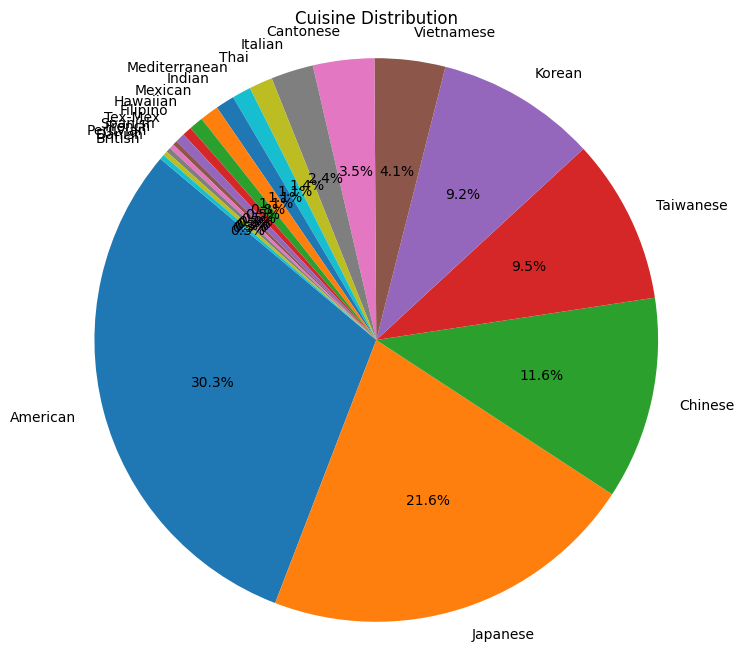

In [7]:
import matplotlib.pyplot as plt

cuisine_counts = foodie['Cuisine'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cuisine Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie a circle
plt.show()

/var/folders/mx/yp1fzlzs2wz1d24gdvc02wcr0000gn/T/ipykernel_1366/3566205802.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/var/folders/mx/yp1fzlzs2wz1d24gdvc02wcr0000gn/T/ipykernel_1366/3566205802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cuisine', order=df['Cuisine'].value_counts().index, palette="pastel")


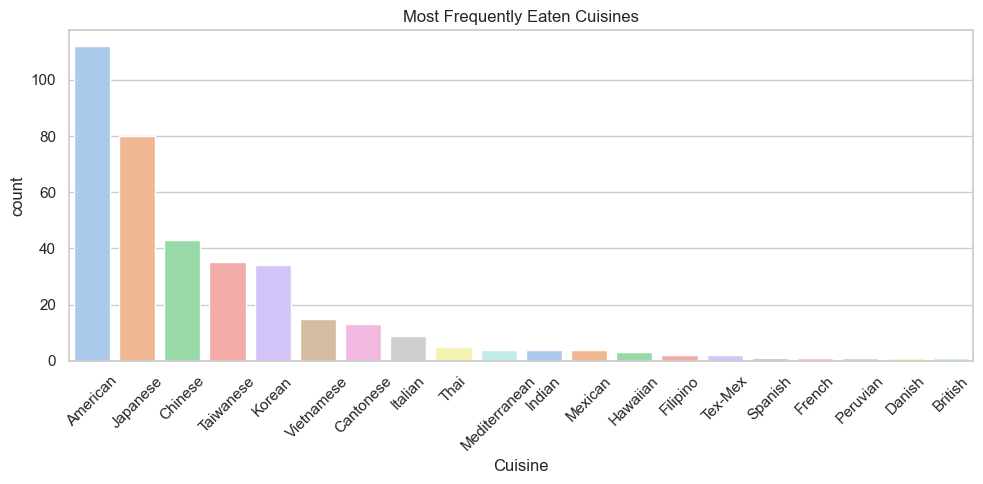

In [8]:
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating (out of 10)'], errors='coerce')
df['Price'] = df['Price ($-$$$)'].str.strip()
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Cuisine', order=df['Cuisine'].value_counts().index, palette="pastel")
plt.title('Most Frequently Eaten Cuisines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/mx/yp1fzlzs2wz1d24gdvc02wcr0000gn/T/ipykernel_1366/3757378888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Mood", order=df["Mood"].value_counts().index, palette="Set2")


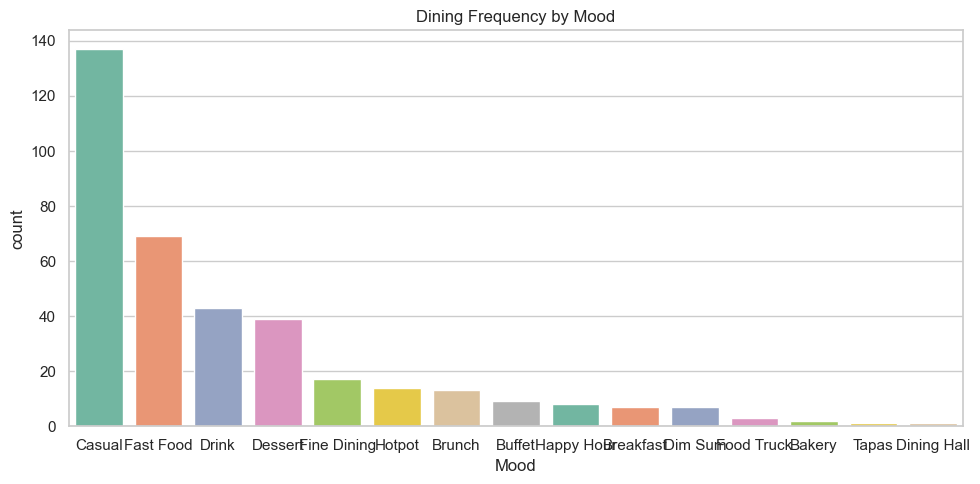

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Mood", order=df["Mood"].value_counts().index, palette="Set2")
plt.title("Dining Frequency by Mood")
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

features = df[['Cuisine', 'Price', 'Mood']]
features = features.dropna()

# Encode categorical data
le_cuisine = LabelEncoder()
le_price = LabelEncoder()
le_mood = LabelEncoder()

features['CuisineEncoded'] = le_cuisine.fit_transform(features['Cuisine'])
features['PriceEncoded'] = le_price.fit_transform(features['Price'])
features['MoodEncoded'] = le_mood.fit_transform(features['Mood'])

ml_ready = features[['CuisineEncoded', 'PriceEncoded', 'MoodEncoded']]
print(ml_ready.head())

   CuisineEncoded  PriceEncoded  MoodEncoded
0               0             0            9
1               9             0            9
2               0             0            9
3              11             0            9
4               0             0            5


Photos for Cere Tea:



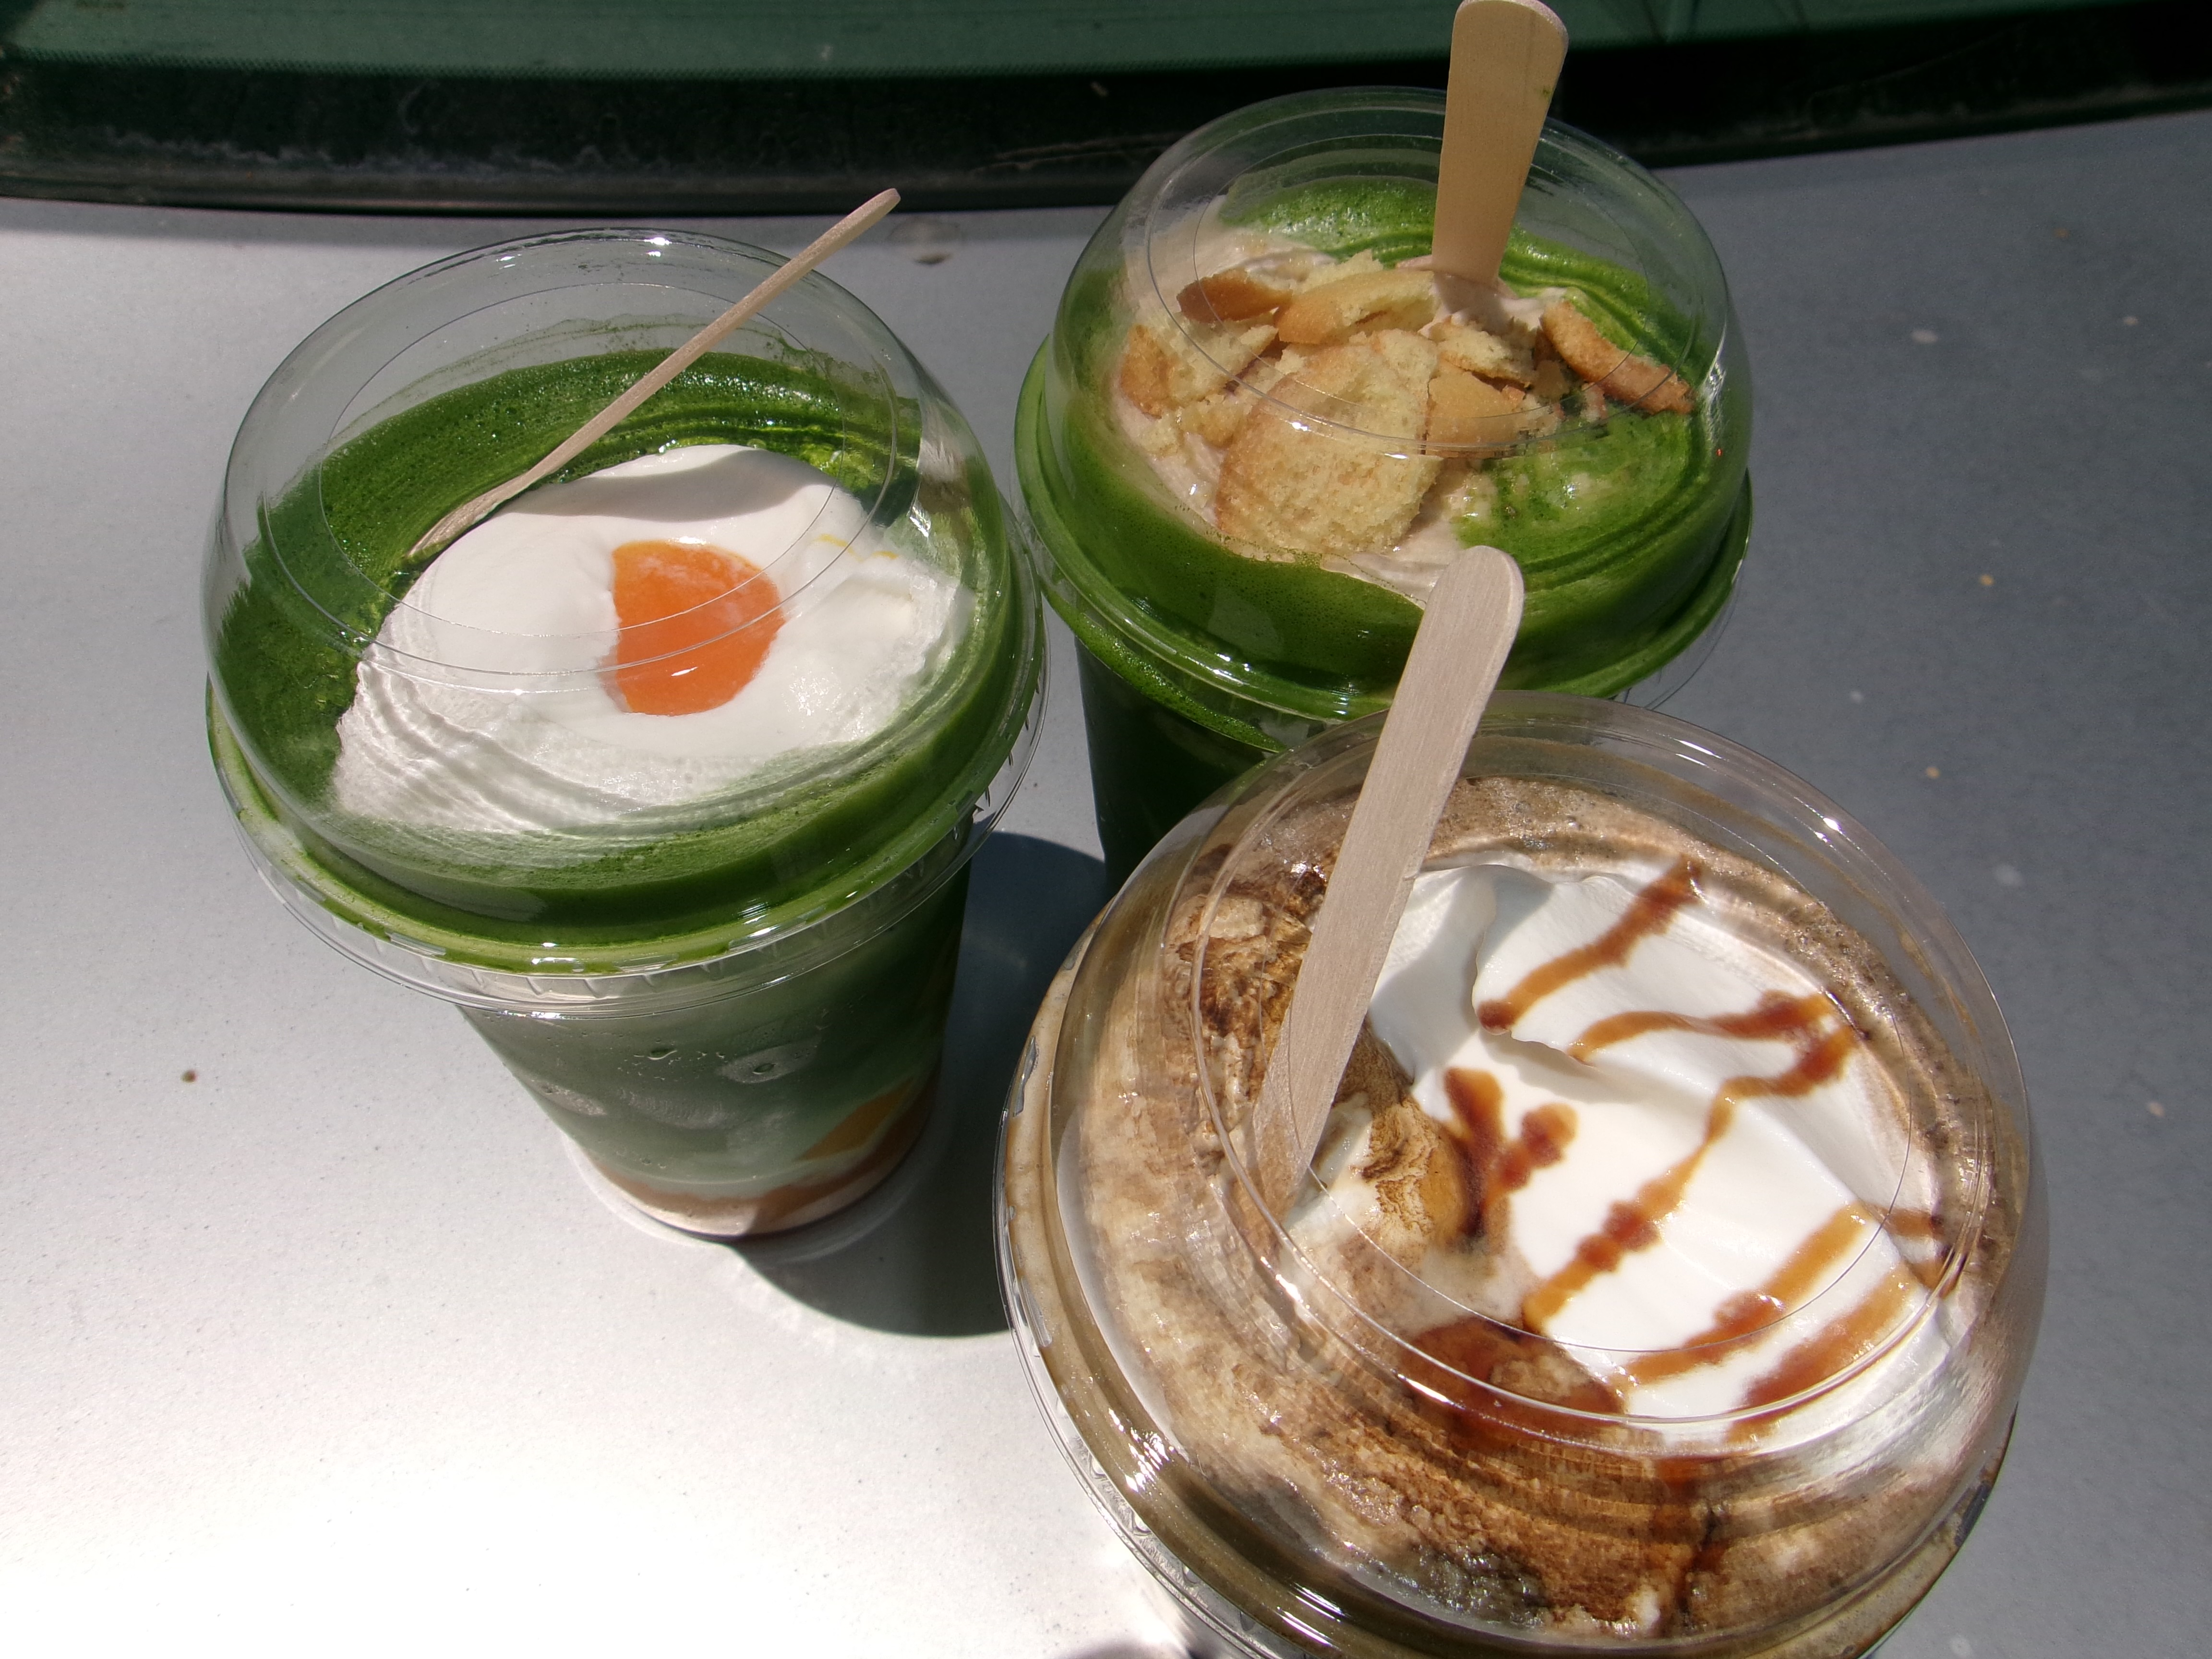

In [12]:
from IPython.display import Image, display

# Optional: ask the user for input
target_restaurant = input("Enter a restaurant name: ").strip()

# Filter the DataFrame
subset = df[df['Restaurant'].str.strip().str.lower() == target_restaurant.lower()]

# Check if any matches were found
if subset.empty:
    print(f"No photos found for '{target_restaurant}'.")
else:
    print(f"Photos for {target_restaurant}:\n")
    for _, row in subset.iterrows():
        photo = str(row['Photo']).strip()
        if pd.notna(photo) and photo.lower().endswith(('.jpg', '.jpeg', '.png')):
            display(Image(filename=photo, width=100))